# Cleaning data

I´m going to clean the dataset of Palmer Penguin in Pandas library

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#getting the data
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
#getting the info of the data and the size
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


(344, 7)

## Outlier data

Create a box plot for finding the outliers with the interquartile range

{'bill_length_mm': 0, 'bill_depth_mm': 0, 'flipper_length_mm': 0, 'body_mass_g': 0}
{'bill_length_mm': 0, 'bill_depth_mm': 0, 'flipper_length_mm': 0, 'body_mass_g': 0}


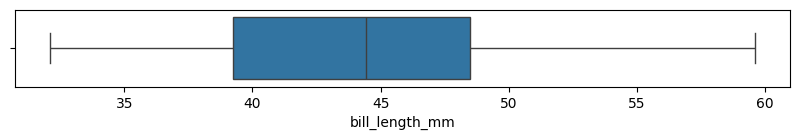

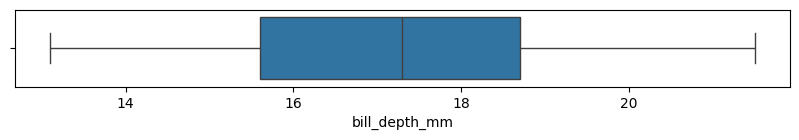

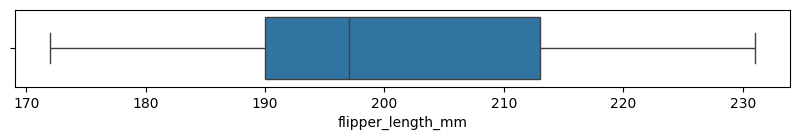

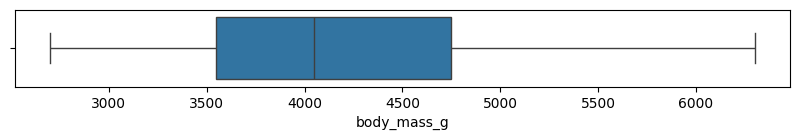

In [23]:
#select the columns with numerical values
outlier_IQR = {}
outlier_SD = {}
num_columns = data.select_dtypes(include='float64').columns

for column in num_columns:
    #plotting the boxplot for the numerical columns
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data[num_columns], x=column)

    #calculating the IQR and outliers
    q1 = data[column].quantile(0.25)
    q3 = np.percentile(data[column], 75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    outlier_IQR[column] = (data[column]<lower_bound).sum() + (data[column]>upper_bound).sum()

    #calculating the standard deviation and outliers
    mean = data[column].mean()
    std = data[column].std()
    outlier_SD[column] = (data[column]>(mean+3*std)).sum() + (data[column]<(mean-3*std)).sum()

print(outlier_IQR)
print(outlier_SD)


## Null Data



In [27]:
#finding the number of missing values in each column
data.isna().sum()
#data.isna().sum()/len(data)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Replace the null data because this represent a few percentage of total

In [28]:
median_bl = data['bill_length_mm'].median()
mean_bd = data['bill_depth_mm'].mean()


